# 从头手搓-简单线性回归

In [12]:
# synthsis some datas with preset weights and bias
# create datas

import torch

def synth_datas(
    w:torch.Tensor = torch.tensor([2, -3.4], dtype=torch.float32),
    b:torch.Tensor = torch.tensor(4.2, dtype=torch.float32), 
    data_nums:int = 100000
):
    X = torch.normal(mean=0, std=0.1, size=(data_nums, w.shape[0]))
    y = X @ w.reshape(-1, 1) + b + torch.normal(mean=0, std=0.01, size=(data_nums,1))
    return X, y  

features, labels = synth_datas()
features.shape, labels.shape

(torch.Size([100000, 2]), torch.Size([100000, 1]))

In [13]:
# set datas to Datasets of PyTorch

from torch.utils import data 
import time

# datasets = data.TensorDataset(features, labels)

def iter_data(
    features:torch.tensor, 
    labels:torch.tensor, 
    batch_size:int = 100
):
    shuffle = torch.randperm(len(features)) # tensor

    for iter in range(0, len(features), batch_size):
        batch_shuffle = shuffle[iter:(iter+batch_size)]

        batch_features = features[batch_shuffle]

        batch_labels = labels[batch_shuffle]
        
        yield (batch_features, batch_labels)

start = time.time()
batch_size = 100
for iter in iter_data(features=features, labels=labels, batch_size=batch_size):
    X, y = iter
    X, y = X.to('cuda:0'), y.to('cuda:0')
    # print(X.shape, y.shape)
    # print(X,'\n',y)
    # break

stop = time.time()
print(f'The time (s) of loading datasets each epoch: {stop - start} s')
print(f'The time (s) of loading datasets each iter in a epoch: {(stop - start)/batch_size} s')

The time (s) of loading datasets each epoch: 0.06262493133544922 s
The time (s) of loading datasets each iter in a epoch: 0.0006262493133544921 s


weight =  tensor([[1.0165e-03],
        [3.5886e-06]], device='cuda:0', requires_grad=True)
weight.shape =  torch.Size([2, 1])
bias =  tensor([0.0111], device='cuda:0', requires_grad=True)
bias.shape =  torch.Size([1])
Learned weight = torch.Size([2, 1])
Learned weight = tensor([[ 1.9997],
        [-3.3996]], device='cuda:0', requires_grad=True)
Learned bias = torch.Size([1])
Learned bias = tensor([4.2000], device='cuda:0', requires_grad=True)


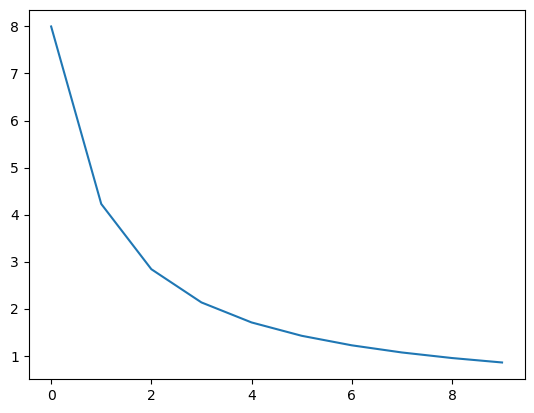

In [14]:
# Define the network structure

import torch 
import matplotlib.pyplot as plt 

def net(weight, bias, features):
    y_hat = features @ weight + bias
    return y_hat

def loss_fn(y_hat, labels):
    loss = (y_hat - labels)**2 / 2
    return loss

def update_params(params, lr=0.001, batch_size=100):
    with torch.no_grad():
        for param in params:
            # param -= (lr * param.grad)/batch_size    # 数值变小，以防后续数值不稳定
            param -= lr*param.grad/batch_size
            param.grad.zero_()

batch_size = 100
epochs = 10

# initialize the weiht with normal
weight = torch.normal(mean=0, std=0.01, size=(2, 1), dtype=torch.float32, requires_grad=True, device='cuda:0')
print('weight = ', weight)
print('weight.shape = ', weight.shape)
bias = torch.normal(mean=0, std=0.01, size=(1,), dtype=torch.float32, requires_grad=True, device='cuda:0')
print('bias = ', bias)
print('bias.shape = ', bias.shape)

loss_in_epoch = []
loss_in_epochs = []
for epoch in range(epochs):
    for iter in iter_data(features=features, labels=labels, batch_size=100):
        X, y = iter
        X, y = X.to('cuda:0'), y.to('cuda:0')
        y_hat = net(features=X, weight=weight, bias=bias)
        loss = loss_fn(y_hat, y)
        loss.sum().backward()   # 必须是标量才能求导，loss.sum()变成标量
        update_params(params=[weight, bias], lr=0.1, batch_size=batch_size)
        # print(f'loss: {loss.detach().numpy()}')
        loss_in_epoch.append(loss.sum().detach())
    # print(loss_in_epoch)
    loss_mean_in_epoch = torch.mean(torch.tensor(loss_in_epoch))
    loss_in_epochs.append(loss_mean_in_epoch)
print('='*20)
print(f'Learned weight = {weight.shape}')
print(f'Learned weight = {weight}')
print(f'Learned bias = {bias.shape}')
print(f'Learned bias = {bias}')

plt.figure()
plt.plot(loss_in_epochs)

# PyTorch简单线性回归

In [19]:
import torch 

def synth_datas(w, b, example_nums):
    X = torch.normal(mean=0, std=0.1, size=(example_nums, w.shape[0]), dtype=torch.float32)
    y = X@w + b
    y += torch.normal(mean=0, std=0.1, size=y.shape, dtype=torch.float32)
    return X, y 

w = torch.tensor([2, -3.4], dtype=torch.float32).reshape(2, 1)  # 注意形状 (shape)
b = torch.tensor([4.2], dtype=torch.float32)
features, labels = synth_datas(w=w, b=b, example_nums=10000)
features.shape, labels.shape

(torch.Size([10000, 2]), torch.Size([10000, 1]))

1/100	loss=	tensor(0.5522)
2/100	loss=	tensor(0.1005)
3/100	loss=	tensor(0.0703)
4/100	loss=	tensor(0.0502)
5/100	loss=	tensor(0.0368)
6/100	loss=	tensor(0.0278)
7/100	loss=	tensor(0.0219)
8/100	loss=	tensor(0.0179)
9/100	loss=	tensor(0.0153)
10/100	loss=	tensor(0.0135)
11/100	loss=	tensor(0.0123)
12/100	loss=	tensor(0.0115)
13/100	loss=	tensor(0.0110)
14/100	loss=	tensor(0.0107)
15/100	loss=	tensor(0.0104)
16/100	loss=	tensor(0.0103)
17/100	loss=	tensor(0.0102)
18/100	loss=	tensor(0.0101)
19/100	loss=	tensor(0.0101)
20/100	loss=	tensor(0.0100)
21/100	loss=	tensor(0.0100)
22/100	loss=	tensor(0.0100)
23/100	loss=	tensor(0.0100)
24/100	loss=	tensor(0.0100)
25/100	loss=	tensor(0.0100)
26/100	loss=	tensor(0.0100)
27/100	loss=	tensor(0.0100)
28/100	loss=	tensor(0.0100)
29/100	loss=	tensor(0.0100)
30/100	loss=	tensor(0.0100)
31/100	loss=	tensor(0.0100)
32/100	loss=	tensor(0.0100)
33/100	loss=	tensor(0.0100)
34/100	loss=	tensor(0.0100)
35/100	loss=	tensor(0.0100)
36/100	loss=	tensor(0.0100)
3

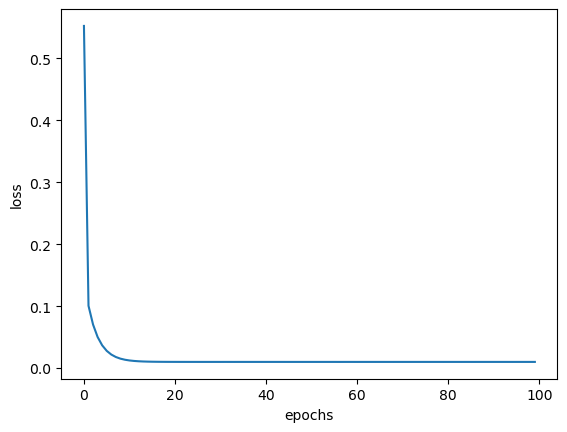

In [139]:
from torch.utils import data 
import time 
from torch import nn
from torch import optim
import matplotlib.pyplot as plt

datasets = data.TensorDataset(features, labels)
iter_datasets = data.DataLoader(
    dataset = datasets, 
    shuffle = True, 
    batch_size = 100, 
    num_workers = 10
)

# net = nn.Sequential(nn.Linear(2, 1)).to('cuda:0')
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, X):
        return self.linear(X)

net = Net()
net = net.to('cuda:0')

loss_fn = nn.MSELoss()
optimer = optim.SGD(net.parameters(), lr=0.1)

start = time.time()
epochs = 100
loss_epochs = []
for epoch in range(epochs):
    losses_in_a_epoch = []
    for iter in iter_datasets:
        X, y = iter
        X, y = X.to('cuda:0'), y.to('cuda:0')
        y_hat = net(X)
        loss = loss_fn(y_hat, y)
        optimer.zero_grad()
        loss.backward()
        optimer.step()
        losses_in_a_epoch.append(loss.detach())
    loss_mean = torch.mean(torch.tensor(losses_in_a_epoch))
    print(f'{epoch+1}/{epochs}', 'loss=', loss_mean, sep='\t')
    loss_epochs.append(loss_mean)
# print(f'learned_weight: {net[0].weight.data}')
# print(f'learned_bias: {net[0].bias.data}')
print(f'learned_weight: {net.linear.weight.data}')
print(f'learned_bias: {net.linear.bias.data}')
plt.figure()
plt.plot(loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
stop = time.time()
print(f'Total time: {stop - start} s.')

# PyTorch lightning

- 官方教程：[https://lightning.ai/docs/pytorch/stable/expertise_levels.html](https://lightning.ai/docs/pytorch/stable/expertise_levels.html)

In [1]:
# synthsis some datas with preset weights and bias
# create datas

import torch

def synth_datas(
    w:torch.Tensor = torch.tensor([2, -3.4], dtype=torch.float32),
    b:torch.Tensor = torch.tensor(4.2, dtype=torch.float32), 
    data_nums:int = 100000
):
    X = torch.normal(mean=0, std=0.1, size=(data_nums, w.shape[0]))
    y = X @ w.reshape(-1, 1) + b + torch.normal(mean=0, std=0.01, size=(data_nums,1))
    return X, y  

features, labels = synth_datas()
features.shape, labels.shape

(torch.Size([100000, 2]), torch.Size([100000, 1]))

In [2]:
import torch 
from torch.utils import data
from torch import nn, optim
import lightning as L

######################################################
# 1. Datasets module (data.py)
######################################################
datasets = data.TensorDataset(features, labels)
iter_datasets = data.DataLoader(dataset=datasets, shuffle=True, batch_size=128, num_workers=10)

######################################################
# 2. Define the network structure (network.py)
######################################################
# Pre-define the network structure via torch.nn.Module
class AlphaFold2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(nn.Linear(2, 1))

    def forward(self, X):
        return self.linear(X)

######################################################
# 3. PyTorch lightning structure (lightningNetwork.py)
######################################################
class LNet(L.LightningModule):
    def __init__(self, learning_rate=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.model = AlphaFold2()                       # Init the network
        self.loss_fn = nn.MSELoss()                     # Init the loss function

    def forward(self, X):   # Forward
        return self.model(X)

    def training_step(self, batch, batch_idx):
        X, y = batch 
        y_hat = self.forward(X)
        loss = self.loss_fn(y_hat, y)             # cal. loss
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = optim.SGD(self.parameters(), lr=0.01)   # Define optimizer
        return optimizer

    def validation_step(self, batch, batch_idx):
        X, y = batch 
        y_hat = self.forward(X)
        loss = nn.functional.mse_loss(y_hat, y)
        self.log('val_loss', loss, prog_bar=True)
        return loss

    def test_step(self, batch, batch_idx):
        X, y = batch 
        y_hat = self.forward(X)
        loss = nn.functional.mse_loss(y_hat, y)
        self.log('test_loss', loss)
        return loss

    def predict_step(self, batch, batch_idx):
        X, _ = batch 
        y_hat = self.forward(X)
        return y_hat

######################################################
# 3. init the net and start training (main.py)
######################################################
autoNet = LNet()
trainer = L.Trainer(
    # default_root_dir="./lightning_logs", # saves checkpoints to './lightning_logs' at every epoch end
    limit_train_batches=1, 
    max_epochs=5, 
    devices=1, 
    accelerator="gpu", 
    # log_every_n_steps=1,
    # profiler="simple"
)

## training and validation
## 可以单独进行validation
trainer.fit(model=autoNet, train_dataloaders=iter_datasets, val_dataloaders=iter_datasets)
# trainer.validate(model=autoNet, dataloaders=iter_datasets)    

## The test set is NOT used during training, 
## it is ONLY used once the model has been trained to see how the model will do in the real-world.
# trainer.test(model=autoNet, dataloaders=iter_datasets)

## prediction
# trainer.predict(model=autoNet, dataloaders=iter_datasets)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
`Trainer(limit_train_batches=1)` was configured so 1 batch per epoch will be used.
You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 4: 100%|██████████| 1/1 [00:03<00:00,  0.33it/s, v_num=21, train_loss=12.50, val_loss=12.20]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:03<00:00,  0.33it/s, v_num=21, train_loss=12.50, val_loss=12.20]


In [109]:
checkpoint = './lightning_logs/version_0/checkpoints/epoch=14-step=15.ckpt'
trained_model = LNet.load_from_checkpoint(checkpoint, map_location='cpu')

# disable randomness, dropout, etc...
trained_model.eval()
y_hat = trained_model(features)                 # map_location='cpu', run on cpu device
# y_hat = trained_model(features.to('cuda:0'))  # default mode trained on gpu, so copy 'features' to gpu, then predict
y_hat

tensor([[1.3291],
        [1.2935],
        [1.3648],
        ...,
        [1.2325],
        [1.3725],
        [1.3493]], grad_fn=<AddmmBackward0>)

# 调试